# **Week 6 - Capstone Development**

## **Decision Trees and Random Forests**

Our moment has arrived. Finally, we can check the performance of these models against the extreme class imbalance in the target set. 

### **Imports**

In [103]:
# Standard Libraries
import os
import time
import math
import io
import zipfile
import requests
from urllib.parse import urlparse
from itertools import chain, combinations

# Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker  # Optional: Format y-axis labels as dollars
import seaborn as sns
import matplotlib.pyplot as plt



# Scikit-learn (Machine Learning)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    RepeatedStratifiedKFold,
    RepeatedKFold
)

from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, root_mean_squared_error, accuracy_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector, f_regression, SelectKBest
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier, ElasticNet
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble        import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, RUSBoostClassifier
# Progress Tracking

from tqdm import tqdm

# =============================
# Global Variables
# =============================
random_state = 42

### **Dataset Imports**

In [2]:
# Base Datasets
BDB_All_Plays_Model_Ready = pd.read_csv("../../BDB_All_Plays_Model_Ready.csv") # Big Data Bowl Dataset
PDA_Model_Ready = pd.read_csv("../../PDA_Model_Ready.csv") # Punt Data Analytics
FNF_Model_Ready = pd.read_csv("../../FNF_Model_Ready.csv") # First and Future


# PCA and Standardized Datasets
PDA_PCA_Features = pd.read_csv('../../Feature_Subsets/PDA_PCA_Features.csv')
FNF_PCA_Features = pd.read_csv('../../Feature_Subsets/FNF_PCA_Features.csv')
BDB_PCA_Features = pd.read_csv('../../Feature_Subsets/BDB_PCA_Features.csv')

### **Useful Functions**

Once again, we will be using the train test split, the run_model_classifier, and the standardize features functions that we obtained originally from Module 3, and have since adapted in the weeks preceeding this. 

### **Train Test Split**

In [6]:
# ===========================================================================================
# Function taken from Module 3 Final Project
# https://github.com/LeeMcFarling/Final_Project_Writeup/blob/main/Final_Project_Report.ipynb
# ===========================================================================================

def train_test_split_data(df, target_col):
    X = df.drop(columns=target_col)
    y = df[target_col]
# 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

and using it to split the data

In [7]:
PDA_PCA_X_train, PDA_PCA_X_test, PDA_PCA_y_train, PDA_PCA_y_test = train_test_split_data(PDA_PCA_Features, 'Inj_Occured')
FNF_PCA_X_train, FNF_PCA_X_test, FNF_PCA_y_train, FNF_PCA_y_test = train_test_split_data(FNF_PCA_Features, 'Inj_Occured')
BDB_PCA_X_train, BDB_PCA_X_test, BDB_PCA_y_train, BDB_PCA_y_test = train_test_split_data(BDB_PCA_Features, 'Inj_Occured')

bdb_X_train, bdb_X_test, bdb_y_train, bdb_y_test = train_test_split_data(BDB_All_Plays_Model_Ready, 'Inj_Occured')
fnf_X_train, fnf_X_test, fnf_y_train, fnf_y_test = train_test_split_data(FNF_Model_Ready, 'Inj_Occured')
pda_X_train, pda_X_test, pda_y_train, pda_y_test = train_test_split_data(PDA_Model_Ready, 'Inj_Occured')


#### **Standardization Function**

In [3]:
# =============================================================================================
# Standardize Numeric Features
#
# Taken from Week 2.ipynb and modified to exclude the hard coded logic
#  
# Originally taken from Mod 3 final project found here: 
# https://github.com/LeeMcFarling/Final_Project_Writeup/blob/main/Final_Project_Report.ipynb
#
# =============================================================================================


def standardize_features(df, target_column=None, debug=False, return_scaler=False):
    df_scaled = df.copy()

    # 1) Automatically detect numeric columns
    numeric_cols = df.select_dtypes(include="number").columns.tolist()

    # 2) Remove target if present
    if target_column in numeric_cols:
        numeric_cols.remove(target_column)

    # 3) Exclude binary (0/1) columns
    numeric_cols_to_scale = [
        col for col in numeric_cols
        if df[col].nunique(dropna=True) > 2
    ]

    if debug:
        print("Numeric columns before filtering:", numeric_cols)
        print("Numeric columns after filtering:", numeric_cols_to_scale)

    # 4) Apply StandardScaler
    scaler = StandardScaler()
    if numeric_cols_to_scale:
        df_scaled[numeric_cols_to_scale] = scaler.fit_transform(df_scaled[numeric_cols_to_scale])

    if return_scaler:
        return df_scaled, scaler
    return df_scaled

And using this to scale our feature sets. 

In [ ]:
PDA_PCA_X_train_scaled = standardize_features(PDA_PCA_X_train)
PDA_PCA_X_test_scaled = standardize_features(PDA_PCA_X_test)
# PDA_PCA_y_train
# PDA_PCA_y_test 


FNF_PCA_X_train_scaled = standardize_features(FNF_PCA_X_train) 
FNF_PCA_X_test_scaled = standardize_features(FNF_PCA_X_test)
# FNF_PCA_y_train
# FNF_PCA_y_test 

BDB_PCA_X_train_scaled = standardize_features(BDB_PCA_X_train)
BDB_PCA_X_test_scaled  = standardize_features(BDB_PCA_X_test)
# BDB_PCA_y_train
# BDB_PCA_y_test 



bdb_X_train_scaled = standardize_features(bdb_X_train)
bdb_X_test_scaled = standardize_features(bdb_X_test)
# bdb_y_train
# bdb_y_test 

fnf_X_train_scaled = standardize_features(fnf_X_train)
fnf_X_test_scaled = standardize_features(fnf_X_test)
# fnf_y_train
# fnf_y_test 

pda_X_train_scaled = standardize_features(pda_X_train)
pda_X_test_scaled = standardize_features(pda_X_test)
# pda_y_train
# pda_y_test 

### **Run Model Classifier**

In [9]:
# =============================================================================================
# Taken from Mod 3 Week 8:
# https://github.com/waysnyder/Module-3-Assignments/blob/main/Homework_08.ipynb
# 
# Global dataframe logic taken from mod 3 final project: 
# https://github.com/LeeMcFarling/Final_Project_Writeup/blob/main/Final_Project_Report.ipynb
# 
# Final Function was developed in Week 2 of this Module
# =============================================================================================

def run_model_classifier(model, X_train, y_train, X_test, y_test, n_repeats=10, n_jobs=-1, run_comment=None, return_model=False, concat_results=False, **model_params):

    global combined_results
    # Remove extra key used to store error metric, if it was added to the parameter dictionary
    if 'accuracy_found' in model_params:
        model_params = model_params.copy()
        model_params.pop('accuracy_found', None)  
        
    # Instantiate the model if a class is provided
    if isinstance(model, type):
        model = model(**model_params)
    else:                                    
        model.set_params(**model_params)    

    model_name = model.__name__ if isinstance(model, type) else model.__class__.__name__ # Added because 


    # Use RepeatedStratifiedKFold for classification to preserve class distribution
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=n_repeats, random_state=42)
    
    # Perform 5-fold cross-validation using accuracy as the scoring metric
    cv_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=n_jobs)
    
    mean_cv_accuracy = np.mean(cv_scores)
    std_cv_accuracy  = np.std(cv_scores)
    
    # Fit the model on the full training set
    model.fit(X_train, y_train)
    
    # Compute training and testing accuracy
    train_preds    = model.predict(X_train)
    test_preds     = model.predict(X_test)

    # Normal Accuracy 
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy  = accuracy_score(y_test, test_preds)

    # Balanced Accuracy Metrics
    balanced_train_accuracy = balanced_accuracy_score(y_train, train_preds)
    balanced_test_accuracy = balanced_accuracy_score(y_test, test_preds)

    results_df = pd.DataFrame([{
        'model': model_name, 
        'model_params': model.get_params(),
        'mean_cv_accuracy': mean_cv_accuracy,
        'std_cv_accuracy': std_cv_accuracy,
        'train_accuracy': train_accuracy, 
        'test_accuracy': test_accuracy,
        'balanced_train_accuracy' : balanced_train_accuracy,
        'balanced_test_accuracy': balanced_test_accuracy,
        'run_comment': run_comment
    }])
    
    if concat_results:
        try:
            combined_results = pd.concat([combined_results, results_df], ignore_index=True)
        except NameError:
            combined_results = results_df

    return (results_df, model) if return_model else results_df

### **Parameter Sweep**

In [163]:
def run_model(model, X_train, y_train, X_test, y_test, n_repeats=10, n_jobs=-1, **model_params):

    # Remove extra key used to store error metric, if it was added to the parameter dictionary
    
    if 'accuracy_found' in model_params:
        model_params = model_params.copy()
        model_params.pop('accuracy_found', None)  
        
    # Instantiate the model if a class is provided
    if isinstance(model, type):
        model = model(**model_params)
    else:                                    
        model.set_params(**model_params)    

    # Use RepeatedStratifiedKFold for classification to preserve class distribution
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=n_repeats, random_state=42)
    
    # Perform 5-fold cross-validation using accuracy as the scoring metric
    cv_scores = cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=n_jobs)
    
    mean_cv_accuracy = np.mean(cv_scores)
    std_cv_accuracy  = np.std(cv_scores)
    
    # Fit the model on the full training set
    model.fit(X_train, y_train)
    
    # Compute training and testing accuracy
    train_preds    = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_preds     = model.predict(X_test)
    test_accuracy  = accuracy_score(y_test, test_preds)
    
    return mean_cv_accuracy, std_cv_accuracy, train_accuracy, test_accuracy


In [157]:
# ===============================================================================================
# From Module 3 Week 8: 
# link: https://github.com/waysnyder/Module-3-Assignments/blob/main/Homework_08.ipynb
# ===============================================================================================

def sweep_parameter(
    model,
    Parameters,
    param,
    parameter_list,
    *,
    X_train,
    y_train,
    X_test,
    y_test,
    verbose=True,
    n_iter_no_change=None,
    delta=0.001,
    n_jobs=-1,
    n_repeats=10,
):
    import time
    import numpy as np
    from tqdm import tqdm
    import matplotlib.pyplot as plt

    start = time.time()
    Parameters = Parameters.copy()  # don’t mutate caller’s dict

    cv_accuracies, std_cvs, train_accuracies, test_accuracies = [], [], [], []
    no_improve_count = 0
    best_accuracy = -np.inf

    for p in tqdm(parameter_list, desc=f"Sweeping {param}"):
        P_temp = Parameters.copy()
        P_temp[param] = p
        P_temp.pop('accuracy_found', None)
        # P_temp.pop('n_jobs', None)

        # run_model should return: mean_cv, std_cv, train_acc, test_acc
        mean_cv, std_cv, train_acc, test_acc = run_model(
            model=model,
            X_train=X_train, y_train=y_train,
            X_test=X_test,   y_test=y_test,
            n_repeats=n_repeats,
            n_jobs=n_jobs,
            **P_temp
        )

        cv_accuracies.append(mean_cv)
        std_cvs.append(std_cv)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        if mean_cv > best_accuracy + delta:
            best_accuracy = mean_cv
            no_improve_count = 0
        else:
            no_improve_count += 1

        if n_iter_no_change is not None and no_improve_count >= n_iter_no_change:
            if verbose:
                print(f"Early stopping: No improvement after {n_iter_no_change} iterations.")
            break

    max_cv_accuracy = max(cv_accuracies)
    max_index = cv_accuracies.index(max_cv_accuracy)
    best_param = parameter_list[max_index]
    Parameters[param] = best_param
    Parameters['accuracy_found'] = max_cv_accuracy

    if verbose:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

        partial_param_list = parameter_list[:len(cv_accuracies)]
        is_boolean = all(isinstance(v, bool) for v in partial_param_list)
        x_vals = list(range(len(partial_param_list))) if is_boolean else partial_param_list
        x_labels = [str(v) for v in partial_param_list]

        ax1.set_title(f"Accuracy vs {param}")
        ax1.plot(x_vals, cv_accuracies, marker='.', label="CV Accuracy", color='blue')
        ax1.plot(x_vals, train_accuracies, marker='.', label="Train Accuracy", color='green')
        ax1.plot(x_vals, test_accuracies, linestyle='--', label="Test Accuracy", color='orange')
        ax1.scatter([x_vals[max_index]], [max_cv_accuracy], marker='x', label="Best CV", color='red')
        ax1.set_ylabel("Accuracy")
        ax1.legend()
        ax1.grid()

        ax2.set_title(f"CV Std vs {param}")
        ax2.plot(x_vals, std_cvs, marker='.', label="CV Std", color='blue')
        ax2.set_xlabel(param)
        ax2.set_ylabel("Std")
        ax2.legend()
        ax2.grid(alpha=0.5)
        if is_boolean:
            ax2.set_xticks(x_vals)
            ax2.set_xticklabels(x_labels)

        plt.tight_layout()
        plt.show()

        end = time.time()
        print("Execution Time:", time.strftime("%H:%M:%S", time.gmtime(end - start)))

    return Parameters

____

## **Decision Trees**

#### **Which DecisionTree parameters are most important?**

When first exploring  a complex model such as decision trees, it’s best to focus first on those parameters that most directly affect the shape of the tree and the method used for splitting nodes. Some parameters are more important than others, especially when first using a model. Here is an approximate ordering of the parameters from most significant to least. We will only experiment with the first 4 of these parameters in this homework. 

---

1. **max_depth** (default: **None**)  
   *Controls the maximum depth of the tree, which is crucial for managing overfitting and overall model complexity.*

2. **max_leaf_nodes** (default: **None**)  
   *An alternative to max_depth, this limits the number of leaf nodes and can be used to control tree size in a different way.*

3. **max_features** (default: **None**)  
   *Determines the maximum number of features considered when looking for the best split. Tuning this can affect the bias-variance trade-off.*

4. **min_samples_split** (default: **2**)  
   *Specifies the minimum number of samples required to split an internal node. It influences how “greedy” the tree is in creating splits.*

---


#### **Parameter Sweeps for Decision Tree**

1. Max Depth

Sweeping max_depth: 100%|██████████| 100/100 [00:29<00:00,  3.35it/s]


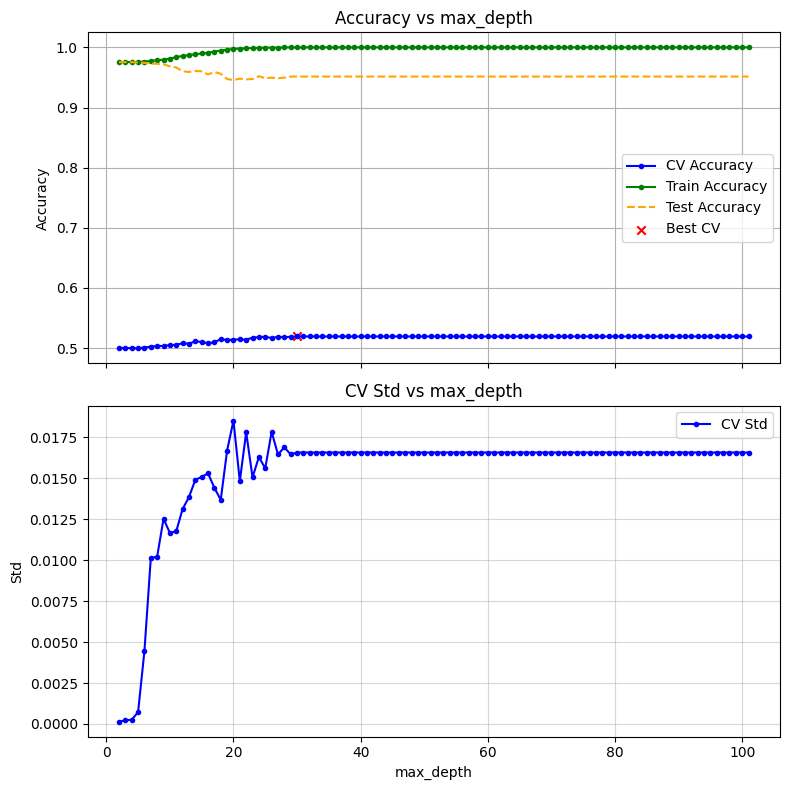

Execution Time: 00:00:30


In [34]:
best_params = sweep_parameter(
    model=DecisionTreeClassifier,
    Parameters={'criterion': 'gini', 'random_state': 42},
    param='max_depth',
    parameter_list=list(range(2, 102)),
    X_train=bdb_X_train_scaled,
    y_train=bdb_y_train,
    X_test=bdb_X_test_scaled,
    y_test=bdb_y_test,
    n_repeats=5,
    n_jobs=-1,
)

2. Max Leaf Nodes

Sweeping max_leaf_nodes: 100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


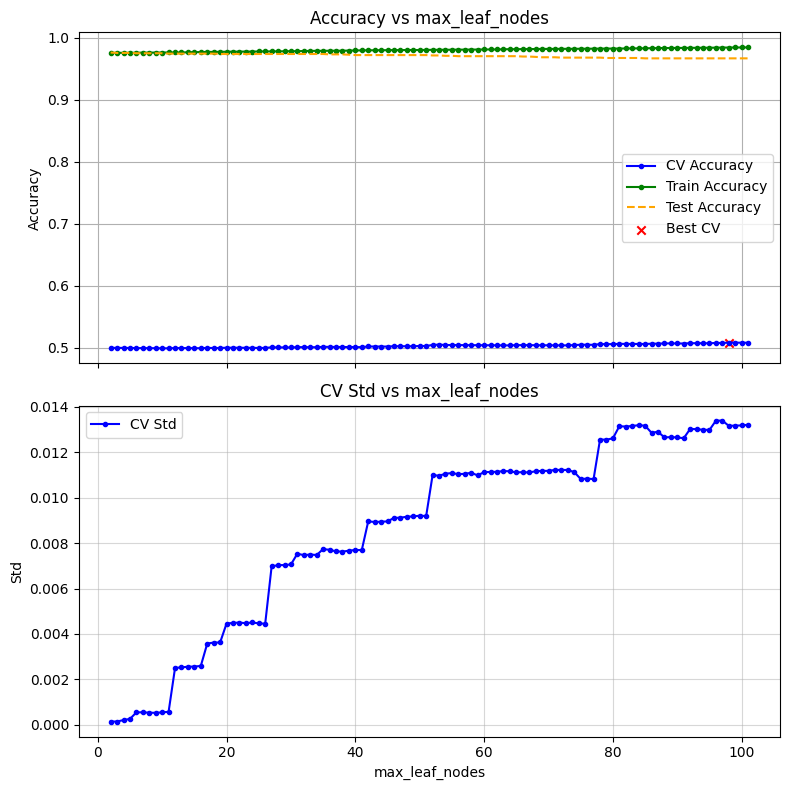

Execution Time: 00:00:23


In [36]:
best_params = sweep_parameter(
    model=DecisionTreeClassifier,
    Parameters={'criterion': 'gini', 'random_state': 42},
    param='max_leaf_nodes',
    parameter_list=list(range(2, 102)),
    X_train=bdb_X_train_scaled,
    y_train=bdb_y_train,
    X_test=bdb_X_test_scaled,
    y_test=bdb_y_test,
    n_repeats=5,
    n_jobs=-1,
)

3. Max Features

Sweeping max_features: 100%|██████████| 100/100 [00:23<00:00,  4.21it/s]


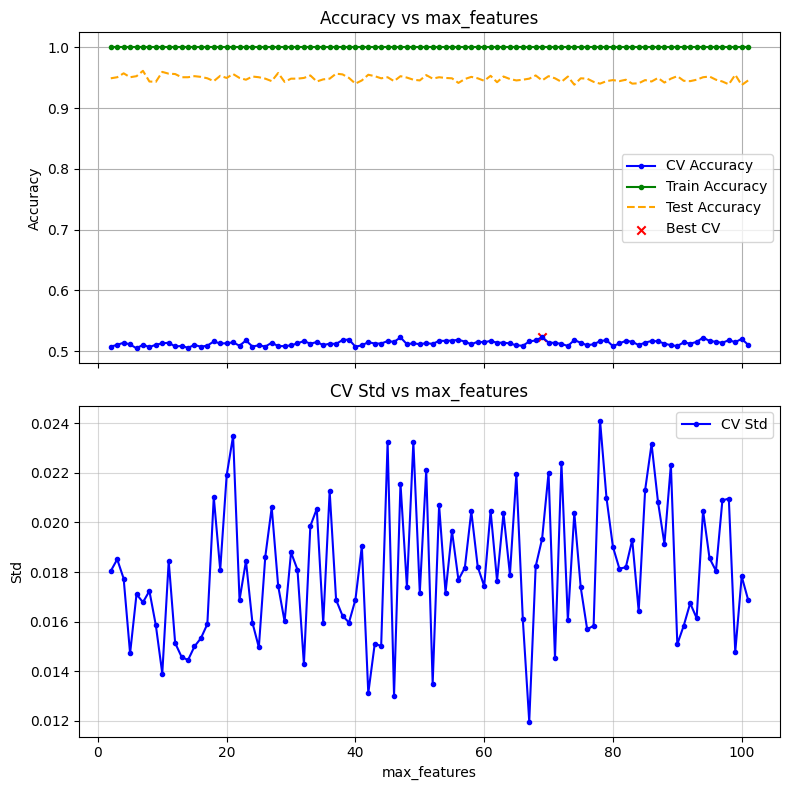

Execution Time: 00:00:23


In [38]:
best_params = sweep_parameter(
    model=DecisionTreeClassifier,
    Parameters={'criterion': 'gini', 'random_state': 42},
    param='max_features',
    parameter_list=list(range(2, 102)),
    X_train=bdb_X_train_scaled,
    y_train=bdb_y_train,
    X_test=bdb_X_test_scaled,
    y_test=bdb_y_test,
    n_repeats=5,
    n_jobs=-1,
)

4) Min Samples Split

Sweeping min_samples_split: 100%|██████████| 100/100 [00:29<00:00,  3.40it/s]


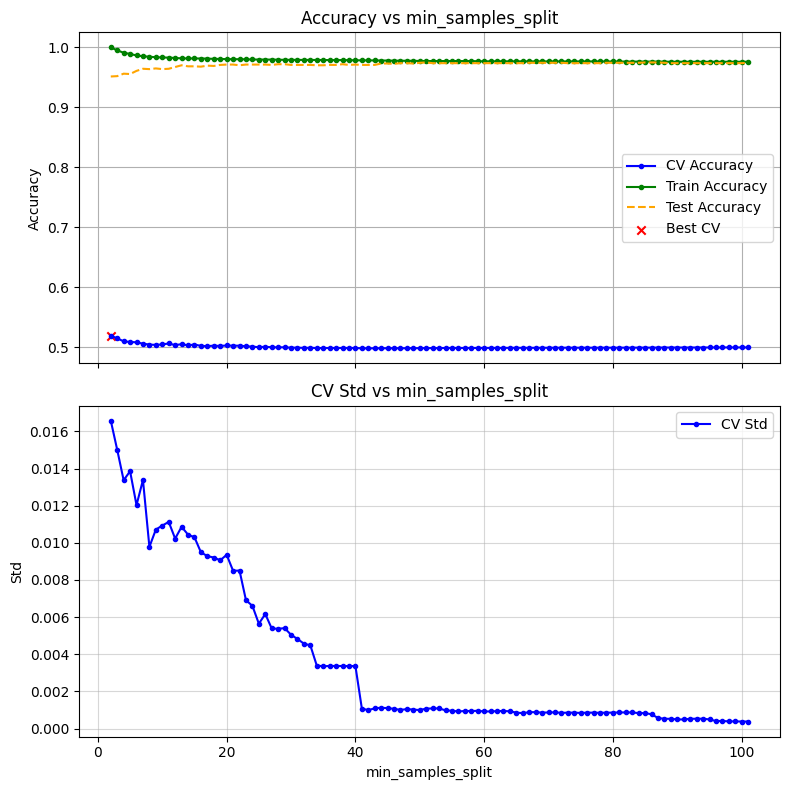

Execution Time: 00:00:29


In [158]:
best_params = sweep_parameter(
    model=DecisionTreeClassifier,
    Parameters={'criterion': 'gini', 'random_state': 42},
    param='min_samples_split',
    parameter_list=list(range(2, 102)),
    X_train=bdb_X_train_scaled,
    y_train=bdb_y_train,
    X_test=bdb_X_test_scaled,
    y_test=bdb_y_test,
    n_repeats=5,
    n_jobs=-1,
)

... well that isn't going well.. I switched it to 'balanced accuracy' becuase it was overfitting. (This is the most balanced of the datasets, because the accuracy was surprise surprise overfitting, I'm just gonna run this model once, because it seems like it's overfitting and we'd be better off concentrating more effort on a random forest. 

In [48]:
params_ = {
    'max_depth' : 20, 
    'max_leaf_nodes' : 60, 
    'max_features' : 70,
    'min_samples_split' : 5,
    'random_state' : 42,
}

BDB_Decision_Tree_Tuned = run_model_classifier(
    DecisionTreeClassifier,
    bdb_X_train_scaled, 
    bdb_y_train, 
    bdb_X_test_scaled,
    bdb_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='BDB - Decision Tree - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

BDB_Decision_Tree_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.969001,0.002206,0.979822,0.97076,0.60325,0.497006,BDB - Decision Tree - Tuned


Yup, yikes that's really overfitting -- let's move on to random forests and ensemble models to see if we can't get a better balanced Test accuracy. 

In [146]:
params_ = {
    'max_depth' : 20, 
    'max_leaf_nodes' : 60, 
    'max_features' : 70,
    'min_samples_split' : 5,
    'random_state' : 42,
}

BDB_PCA_Decision_Tree_Tuned = run_model_classifier(
    DecisionTreeClassifier,
    BDB_PCA_X_train_scaled, 
    BDB_PCA_y_train, 
    BDB_PCA_X_test_scaled,
    BDB_PCA_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='BDB + PCA Features - Decision Tree - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

BDB_PCA_Decision_Tree_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.965902,0.003871,0.980991,0.969006,0.621152,0.496108,BDB + PCA Features - Decision Tree - Tuned


And then let's run through the other Datasets too, just to round out our results. 

#### **First and Future**

In [147]:
params_ = {
    'max_depth' : 20, 
    'max_leaf_nodes' : 60, 
    'max_features' : 70,
    'min_samples_split' : 5,
    'random_state' : 42,
}

FNF_Decision_Tree_Tuned = run_model_classifier(
    DecisionTreeClassifier,
    fnf_X_train_scaled, 
    fnf_y_train, 
    fnf_X_test_scaled,
    fnf_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='FNF Features - Decision Tree - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

FNF_Decision_Tree_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.999581,0.000066,0.999785,0.9997,0.656716,0.499944,FNF Features - Decision Tree - Tuned


In [148]:
params_ = {
    'max_depth' : 20, 
    'max_leaf_nodes' : 60, 
    'max_features' : 70,
    'min_samples_split' : 5,
    'random_state' : 42,
}

FNF_PCA_Decision_Tree_Tuned = run_model_classifier(
    DecisionTreeClassifier,
    FNF_PCA_X_train_scaled, 
    FNF_PCA_y_train, 
    FNF_PCA_X_test_scaled,
    FNF_PCA_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='FNF + PCA Features - Decision Tree - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

FNF_PCA_Decision_Tree_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.999541,0.000078,0.999813,0.999719,0.708953,0.499953,FNF + PCA Features - Decision Tree - Tuned


#### **Punt Data Analytics**

In [149]:
params_ = {
    'max_depth' : 20, 
    'max_leaf_nodes' : 60, 
    'max_features' : 70,
    'min_samples_split' : 5,
    'random_state' : 42,
}

PDA_PCA_Decision_Tree_Tuned = run_model_classifier(
    DecisionTreeClassifier,
    PDA_PCA_X_train_scaled, 
    PDA_PCA_y_train, 
    PDA_PCA_X_test_scaled,
    PDA_PCA_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='PDA + PCA Features - Decision Tree - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

PDA_PCA_Decision_Tree_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.980052,0.001904,0.991018,0.982797,0.706287,0.497727,PDA + PCA Features - Decision Tree - Tuned


In [150]:
params_ = {
    'max_depth' : 20, 
    'max_leaf_nodes' : 60, 
    'max_features' : 70,
    'min_samples_split' : 5,
    'random_state' : 42,
}

PDA_Decision_Tree_Tuned = run_model_classifier(
    DecisionTreeClassifier,
    pda_X_train_scaled, 
    pda_y_train, 
    pda_X_test_scaled,
    pda_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='PDA - Decision Tree - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

PDA_Decision_Tree_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.979566,0.002942,0.990082,0.982797,0.672954,0.497727,PDA - Decision Tree - Tuned


____

## **Random Forest Parameter Sweep**

In [42]:
Default_Parameters_RandomForest = {
    'n_estimators'           : 100,     # Number of trees in the forest
    'criterion'              : 'gini',  # Function to measure quality of a split ('gini' or 'entropy')
    'max_depth'              : None,    # Maximum depth of the tree (None means nodes are expanded until leaves are pure)
    'min_samples_split'      : 2,       # Minimum number of samples required to split an internal node
    'min_samples_leaf'       : 1,       # Minimum number of samples required to be at a leaf node
    'min_weight_fraction_leaf': 0.0,    # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    'max_features'           : 'sqrt',  # Number of features to consider when looking for the best split
    'max_leaf_nodes'         : None,    # Maximum number of leaf nodes
    'min_impurity_decrease'  : 0.0,     # Threshold for a node to split further based on impurity
    'bootstrap'              : True,    # Whether bootstrap samples are used when building trees
    'oob_score'              : False,   # Whether to use out-of-bag samples to estimate accuracy
    'verbose'                : 0,       # Controls the verbosity when fitting and predicting
    'warm_start'             : False,   # Reuse the solution of the previous call to fit and add more estimators
    'class_weight'           : None,    # Weights associated with classes (None means all classes have weight=1)
    'ccp_alpha'              : 0.0,     # Complexity parameter for minimal cost-complexity pruning
    'max_samples'            : None,     # Number of samples to draw from X to train each base estimator (if bootstrap=True)
    'random_state'           : 42
}

In [43]:
Parameters_RF = Default_Parameters_RandomForest.copy()
Params_RF_List = []

Sweeping n_estimators: 100%|██████████| 49/49 [01:42<00:00,  2.09s/it]


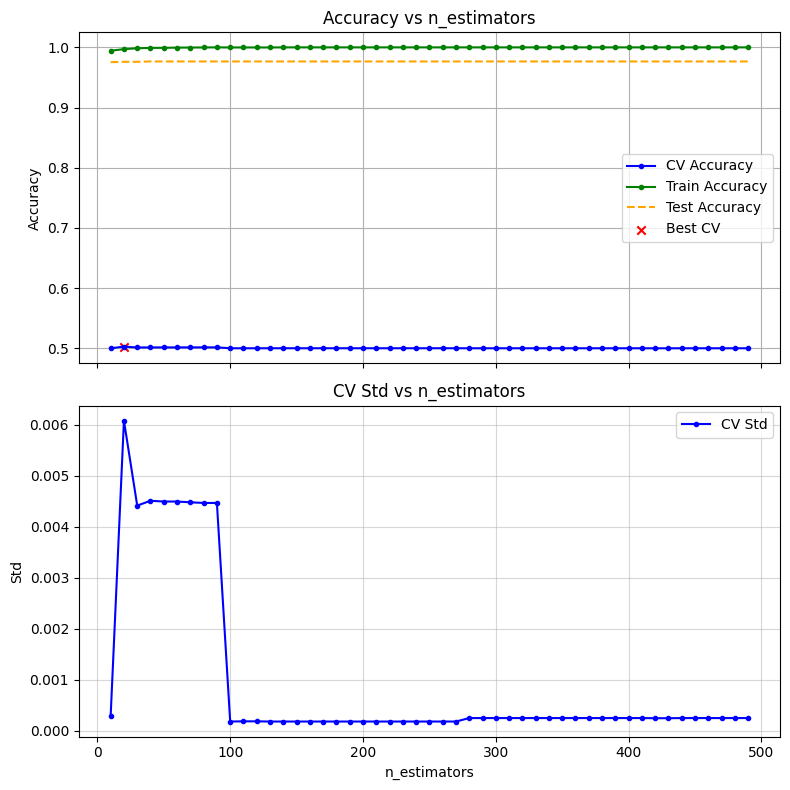

Execution Time: 00:01:42


Sweeping max_depth: 100%|██████████| 50/50 [00:14<00:00,  3.54it/s]


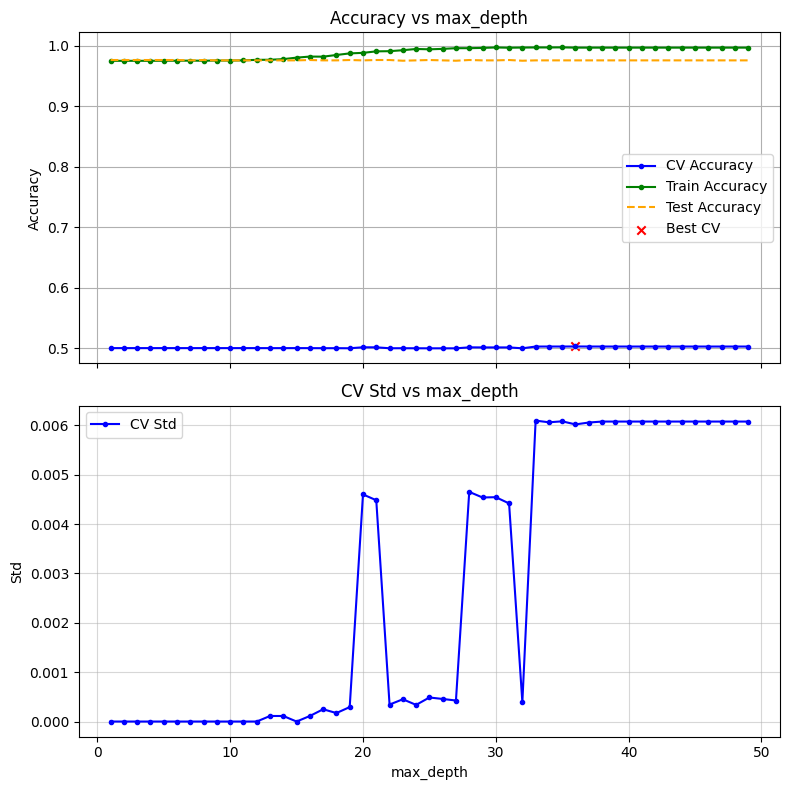

Execution Time: 00:00:14


Sweeping max_samples: 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]


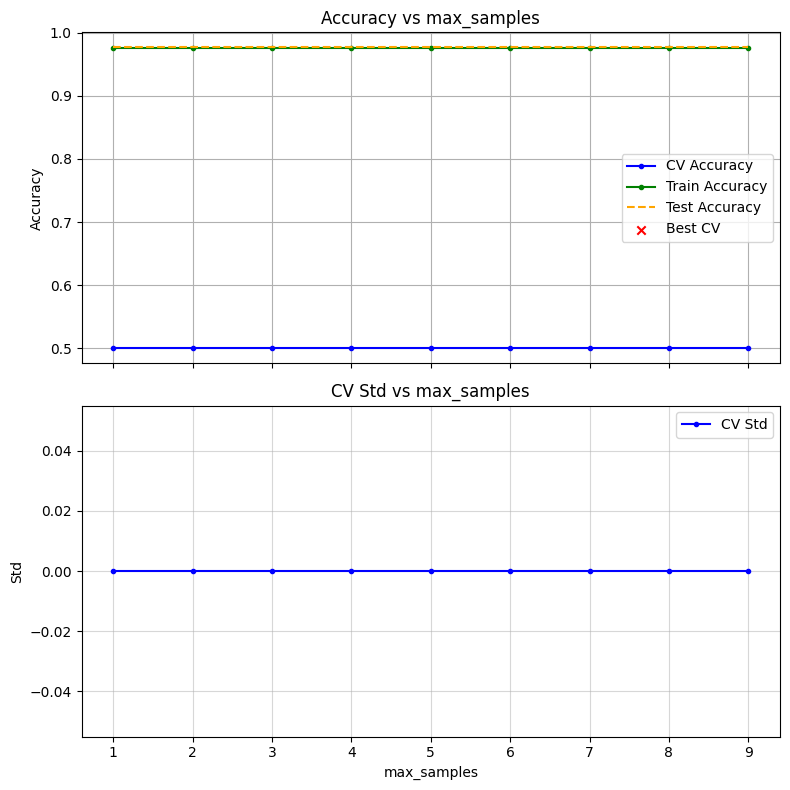

Execution Time: 00:00:01


,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,max_leaf_nodes,min_impurity_decrease,bootstrap,oob_score,verbose,warm_start,class_weight,ccp_alpha,max_samples,random_state,accuracy_found
0,20,gini,36,2,1,0.0,sqrt,None,0.0,True,False,0,False,None,0.0,None,42,0.502723


In [ ]:
start = time.time()

parameters_and_ranges = [
    ('n_estimators', range(10, 500, 10)),
    ('max_depth', [None] + list(range(1, 50, 1))),
    ('max_samples', [None] + list(range(1, 10, 1))),
    # ('max_iter', range(100,10001, 100)),
]

for param, parameter_list in parameters_and_ranges:
    Parameters_RF = sweep_parameter(
        RandomForestClassifier,      # or your model class
        Parameters_RF,          # renamed variable here
        param,
        parameter_list,
        X_train=bdb_X_train_scaled,
        y_train=bdb_y_train,
        X_test=bdb_X_test_scaled,
        y_test=bdb_y_test,
        n_jobs=-1,
        n_repeats=2
    )

Params_RF_List.append(Parameters_RF)
pd.DataFrame(Params_RF_List)

In [47]:
params_ = {
    'n_estimators' : 20, 
    'criterion' : 'gini', 
    'max_depth' : 36,
    'min_samples_split' : 2,
    'random_state' : 42,
}

BDB_Random_Forest_Tuned = run_model_classifier(
    RandomForestClassifier,
    bdb_X_train_scaled, 
    bdb_y_train, 
    bdb_X_test_scaled,
    bdb_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='BDB - Random Forest - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

BDB_Random_Forest_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.974996,0.000713,0.997076,0.976023,0.940828,0.499701,BDB - Random Forest - Tuned


Oof and again we're overfitting. Let's switch gears here and look for models that are built for this king of imbalance.

In [84]:
combined_results

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.974996,0.000713,0.997076,0.976023,0.940828,0.499701,BDB - Random Forest - Tuned
1,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.969001,0.002206,0.979822,0.970760,0.603250,0.497006,BDB - Decision Tree - Tuned


___

I don't suspect this will help much but with PCA Features: 

In [143]:
params_ = {
    'n_estimators' : 20, 
    'criterion' : 'gini', 
    'max_depth' : 36,
    'min_samples_split' : 2,
    'random_state' : 42,
}

BDB_PCA_Random_Forest_Tuned = run_model_classifier(
    RandomForestClassifier,
    BDB_PCA_X_train_scaled, 
    BDB_PCA_y_train, 
    BDB_PCA_X_test_scaled,
    BDB_PCA_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='BDB + PCA - Random Forest - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

BDB_PCA_Random_Forest_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.975201,0.000348,0.997076,0.976608,0.940828,0.5,BDB + PCA - Random Forest - Tuned


____

## **Random Forest Continued**

#### **Let's try these two Models for the First and Future and Punt Data Analytics Datasets**

#### **First and Future Random Forest**

In [138]:
params_ = {
    'n_estimators' : 20, 
    'criterion' : 'gini', 
    'max_depth' : 36,
    'min_samples_split' : 2,
    'random_state' : 42,
}

FNF_Random_Forest_Tuned = run_model_classifier(
    RandomForestClassifier,
    fnf_X_train_scaled, 
    fnf_y_train, 
    fnf_X_test_scaled,
    fnf_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='FNF - Random Forest - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

FNF_Random_Forest_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999691,0.000015,0.999967,0.999813,0.947761,0.5,FNF - Random Forest - Tuned


and Random Forest Trained on FNF PCA Features

In [139]:
params_ = {
    'n_estimators' : 20, 
    'criterion' : 'gini', 
    'max_depth' : 36,
    'min_samples_split' : 2,
    'random_state' : 42,
}

FNF_PCA_Random_Forest_Tuned = run_model_classifier(
    RandomForestClassifier,
    FNF_PCA_X_train_scaled, 
    FNF_PCA_y_train, 
    FNF_PCA_X_test_scaled,
    FNF_PCA_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='FNF + PCA Features - Random Forest - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

FNF_PCA_Random_Forest_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999691,0.000015,0.999963,0.999813,0.940299,0.5,FNF + PCA Features - Random Forest - Tuned


#### **Punt Data Analytics**

In [141]:
params_ = {
    'n_estimators' : 20, 
    'criterion' : 'gini', 
    'max_depth' : 36,
    'min_samples_split' : 2,
    'random_state' : 42,
}

PDA_Random_Forest_Tuned = run_model_classifier(
    RandomForestClassifier,
    pda_X_train_scaled, 
    pda_y_train, 
    pda_X_test_scaled,
    pda_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='PDA - Random Forest - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

PDA_Random_Forest_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.985666,0.000577,0.997754,0.986537,0.92,0.499621,PDA - Random Forest - Tuned


And Punt Data Analytics + PCA Features

In [142]:
params_ = {
    'n_estimators' : 20, 
    'criterion' : 'gini', 
    'max_depth' : 36,
    'min_samples_split' : 2,
    'random_state' : 42,
}

PDA_PCA_Random_Forest_Tuned = run_model_classifier(
    RandomForestClassifier,
    PDA_PCA_X_train_scaled, 
    PDA_PCA_y_train, 
    PDA_PCA_X_test_scaled,
    PDA_PCA_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='PDA + PCA - Random Forest - Tuned', 
    return_model=False,
    concat_results=False,
    **params_
    )

PDA_PCA_Random_Forest_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.985704,0.000421,0.997754,0.986537,0.92,0.499621,PDA + PCA - Random Forest - Tuned


___

### **Combined Results + Discussion**

In [154]:
combined_results.sort_values(by='balanced_test_accuracy', ascending=False)

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
2,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999691,0.000015,0.999967,0.999813,0.947761,0.500000,FNF - Random Forest - Tuned
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999691,0.000015,0.999963,0.999813,0.940299,0.500000,FNF + PCA Features - Random Forest - Tuned
5,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.975201,0.000348,0.997076,0.976608,0.940828,0.500000,BDB + PCA - Random Forest - Tuned
8,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.999541,0.000078,0.999813,0.999719,0.708953,0.499953,FNF + PCA Features - Decision Tree - Tuned
7,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.999581,0.000066,0.999785,0.999700,0.656716,0.499944,FNF Features - Decision Tree - Tuned
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.974996,0.000713,0.997076,0.976023,0.940828,0.499701,BDB - Random Forest - Tuned
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.985666,0.000577,0.997754,0.986537,0.920000,0.499621,PDA - Random Forest - Tuned
9,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.980052,0.001904,0.991018,0.982797,0.706287,0.497727,PDA + PCA Features - Decision Tree - Tuned
10,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.979566,0.002942,0.990082,0.982797,0.672954,0.497727,PDA - Decision Tree - Tuned
1,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.969001,0.002206,0.979822,0.970760,0.603250,0.497006,BDB - Decision Tree - Tuned


So all of our decision trees and random forrests over fit on the data as well. This is definitely a setback, though our options are not completely done. 


I suspect that the data is just overfitting on the extreme class imbalance and 'learning' to pick 'no_injury' every time. This is because the accuracy metrics not adjusted for balance are all reading around 98% which is almost exactly what the classes are IRL. (98.5%, and 2.5% and below, respectively.)

Our options from here are to try some ensemble models that are specifically built for handling class imbalance. We could try a BaggingTrees model to see if the bootstrapping will help our class imbalance. 

Additionally, there are other ML libraries, imblearn and XGBoost, that are built specifically for this kind of extreme imbalance. 

IMBLearn has models that randomly undersample the majority class (in our case, the non-injury class) and then runs either a decicion tree or random forest model as an ensemble 'estimator' N number of times. I think that this strategy would be a strong and useful way to try to go about this. 

___

### **Bagging Trees**

**BaggingRegressor -- Most important hyperparameters for model taken from Module 3**

Most Important Parameters

- n_estimators (default: 10)
    - Determines the number of base estimators in the ensemble. Increasing this number can reduce variance and improve performance, though it comes with higher computational cost.

- max_samples (default: 1.0)
    - Specifies the number (or fraction) of samples to draw from the training set for each base estimator. This is crucial for controlling the diversity of the estimators and can directly affect bias and variance.

- max_features (default: 1.0)
    - Specifies the number (or fraction) of features to consider when training each base estimator. Adjusting this parameter can help manage overfitting by limiting the complexity of each individual estimator.

- bootstrap (default: True)
    - Indicates whether samples are drawn with replacement. Bootstrap sampling introduces randomness into the training process, leading to more diverse estimators and often improved ensemble performance.

#### **BaggingClassifier Parameter Sweep**

Default Parameters: 

In [168]:
Default_Parameters_Bagging = {
    'n_estimators': 10,                # Top 4
    'max_samples': 1.0,                # Top 4
    'max_features': 1.0,               # Top 4
    'bootstrap': True,                 # Top 4
    'oob_score': False,
    'bootstrap_features': False,
    'random_state': 42,
}

In [169]:
Parameters_BagTr = Default_Parameters_Bagging.copy()
Params_BagTr_List = []

Sweeping n_estimators: 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]


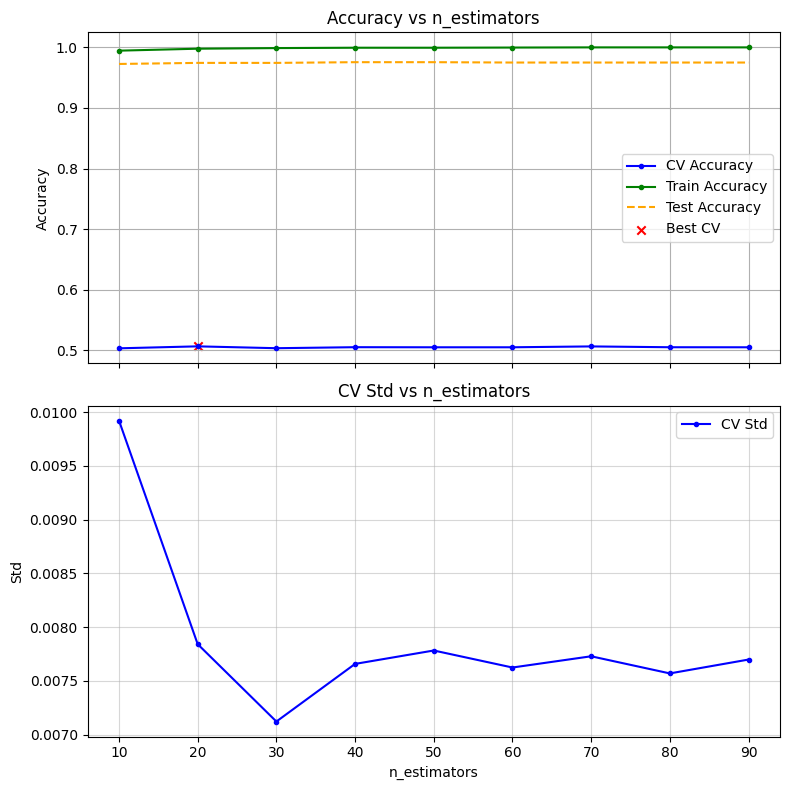

Execution Time: 00:00:28


Sweeping max_samples: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]


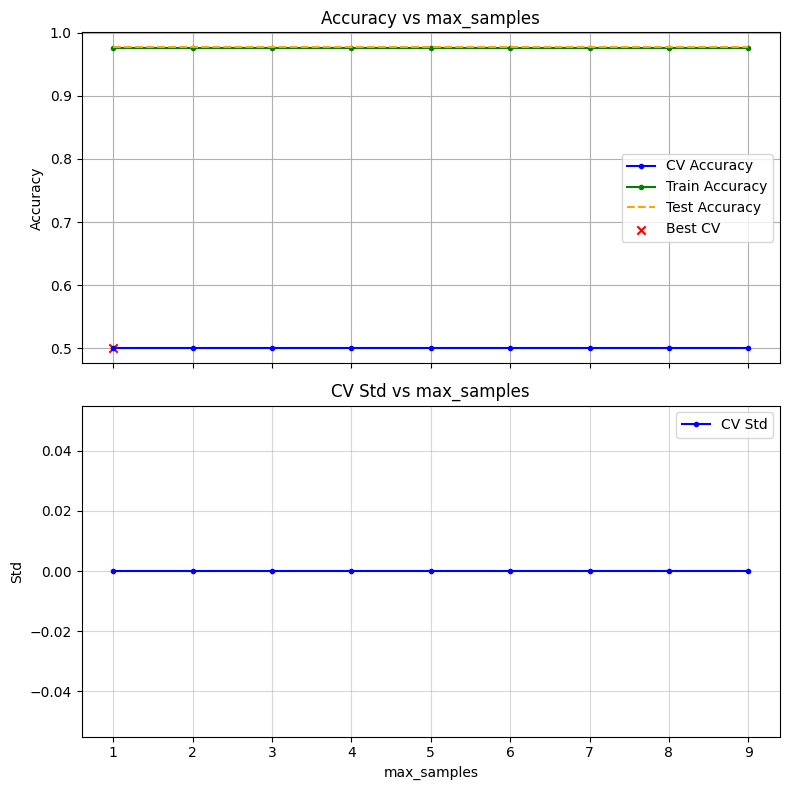

Execution Time: 00:00:02


Sweeping max_features: 100%|██████████| 10/10 [00:01<00:00,  5.16it/s]


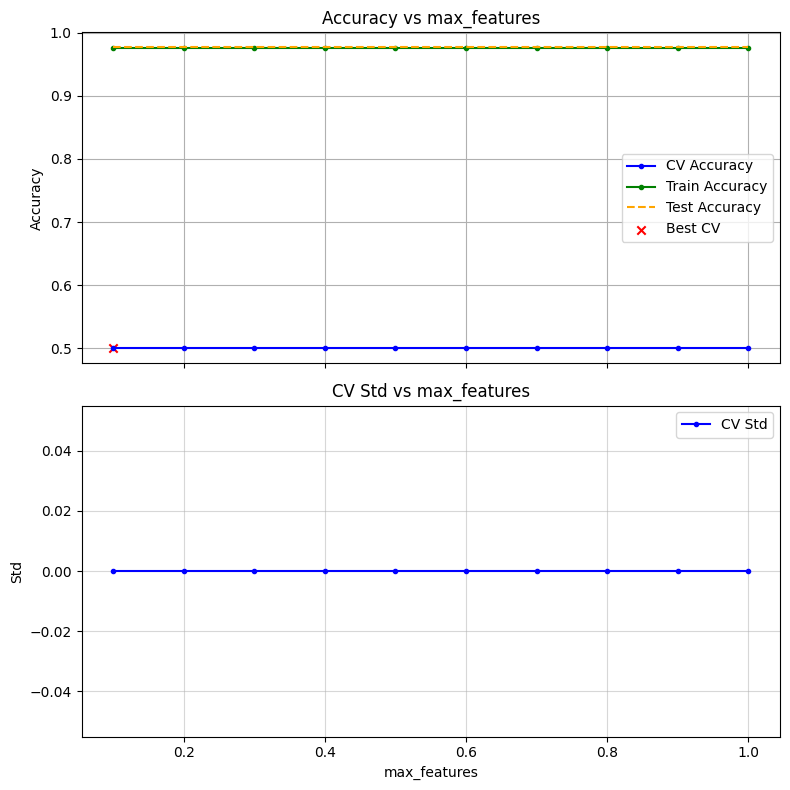

Execution Time: 00:00:02


Sweeping bootstrap: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]


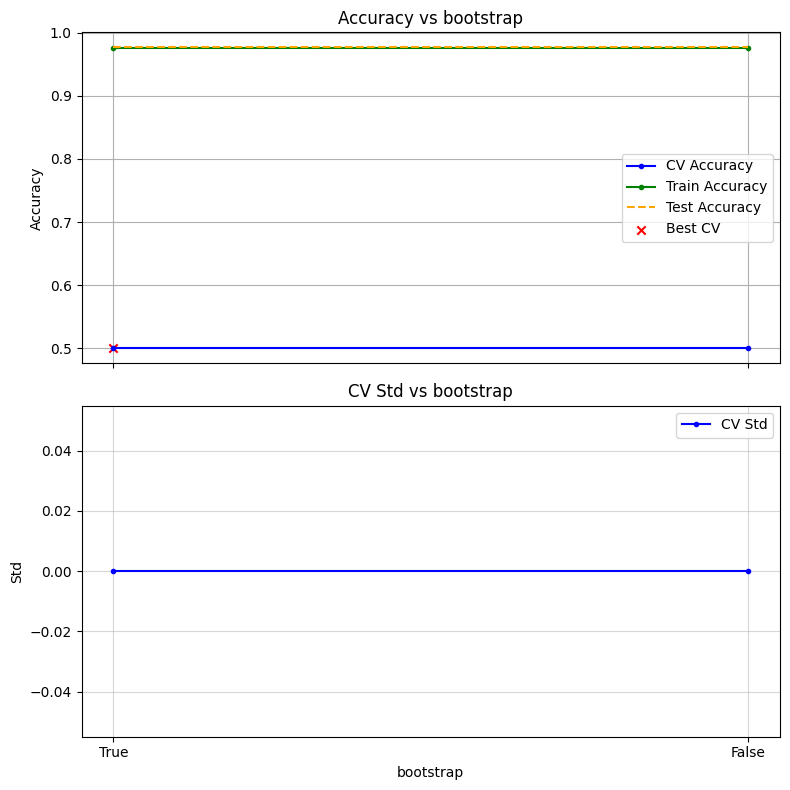

Execution Time: 00:00:00


,n_estimators,max_samples,max_features,bootstrap,oob_score,bootstrap_features,random_state,accuracy_found
0,20,1,0.1,True,False,False,42,0.5


In [171]:
start = time.time()

parameters_and_ranges = [
    ('n_estimators', range(10, 100, 10)),
    ('max_samples', list(range(1, 10, 1))),
    ('max_features', np.linspace(0.1,1,10)),
    ('bootstrap', list([True, False]))

]

for param, parameter_list in parameters_and_ranges:
    Parameters_BagTr = sweep_parameter(
        BaggingClassifier,      # or your model class
        Parameters_BagTr,          # renamed variable here
        param,
        parameter_list,
        X_train=bdb_X_train_scaled,
        y_train=bdb_y_train,
        X_test=bdb_X_test_scaled,
        y_test=bdb_y_test,
        n_jobs=-1,
        n_repeats=2
    )

Params_BagTr_List.append(Parameters_BagTr)
pd.DataFrame(Params_BagTr_List)

And running the model tests for these: 

In [174]:
params_ = {
    'n_estimators' : 20, 
    'max_samples' : 1, 
    'max_features' : 0.1,
    'bootstrap' : True,
    'random_state' : 42,
}

BDB_Bagging_Trees_Tuned = run_model_classifier(
    BaggingClassifier,
    bdb_X_train_scaled, 
    bdb_y_train, 
    bdb_X_test_scaled,
    bdb_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='BDB - Bagging Trees - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

BDB_Bagging_Trees_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.975289,0.000285,0.975289,0.976608,0.5,0.5,BDB - Bagging Trees - Tuned


And the First and Future set: 

In [175]:
params_ = {
    'n_estimators' : 20, 
    'max_samples' : 1, 
    'max_features' : 0.1,
    'bootstrap' : True,
    'random_state' : 42,
}

FNF_Bagging_Trees_Tuned = run_model_classifier(
    BaggingClassifier,
    fnf_X_train_scaled, 
    fnf_y_train, 
    fnf_X_test_scaled,
    fnf_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='FNF - Bagging Trees - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

FNF_Bagging_Trees_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.999686,0.000011,0.999686,0.999813,0.5,0.5,FNF - Bagging Trees - Tuned


And Punt Data Analytics: 

In [176]:
params_ = {
    'n_estimators' : 20, 
    'max_samples' : 1, 
    'max_features' : 0.1,
    'bootstrap' : True,
    'random_state' : 42,
}

PDA_Bagging_Trees_Tuned = run_model_classifier(
    BaggingClassifier,
    pda_X_train_scaled, 
    pda_y_train, 
    pda_X_test_scaled,
    pda_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='PDA - Bagging Trees - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

PDA_Bagging_Trees_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.985966,0.000005,0.985966,0.987285,0.5,0.5,PDA - Bagging Trees - Tuned


#### **Bagging Trees Results**

In [205]:
combined_results[combined_results['run_comment'].str.contains('Bagging Trees')].sort_values(by='balanced_test_accuracy', ascending=False) # [['model', 'mean_cv_accuracy', 'test_accuracy', 'balanced_test_accuracy', 'run_comment']]

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
11,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.975289,0.000285,0.975289,0.976608,0.5,0.5,BDB - Bagging Trees - Tuned
12,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.999686,0.000011,0.999686,0.999813,0.5,0.5,FNF - Bagging Trees - Tuned
13,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.985966,0.000005,0.985966,0.987285,0.5,0.5,PDA - Bagging Trees - Tuned


___

### **Gradient Boosting Trees**

Parameter Sweep: 

In [193]:
Default_Parameters_GradientBoosting = {
    'learning_rate': 0.1,             # Top 4
    'n_estimators': 100,              # Top 4
    'max_depth': 3,                   # Top 4
    'max_features': None,             # Top 4
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_leaf_nodes': None,
    'subsample': 1.0,
    'random_state': 42
}

In [194]:
Parameters_GradBoost = Default_Parameters_GradientBoosting.copy()
Params_GradBoost_List = []

Sweeping learning_rate: 100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


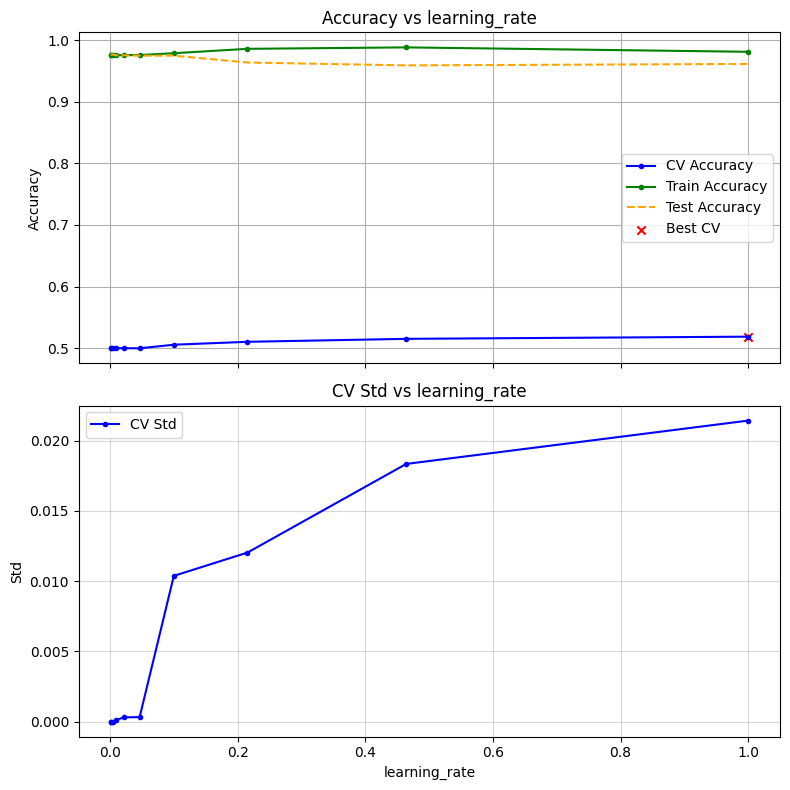

Execution Time: 00:00:18


Sweeping n_estimators: 100%|██████████| 49/49 [03:31<00:00,  4.32s/it]


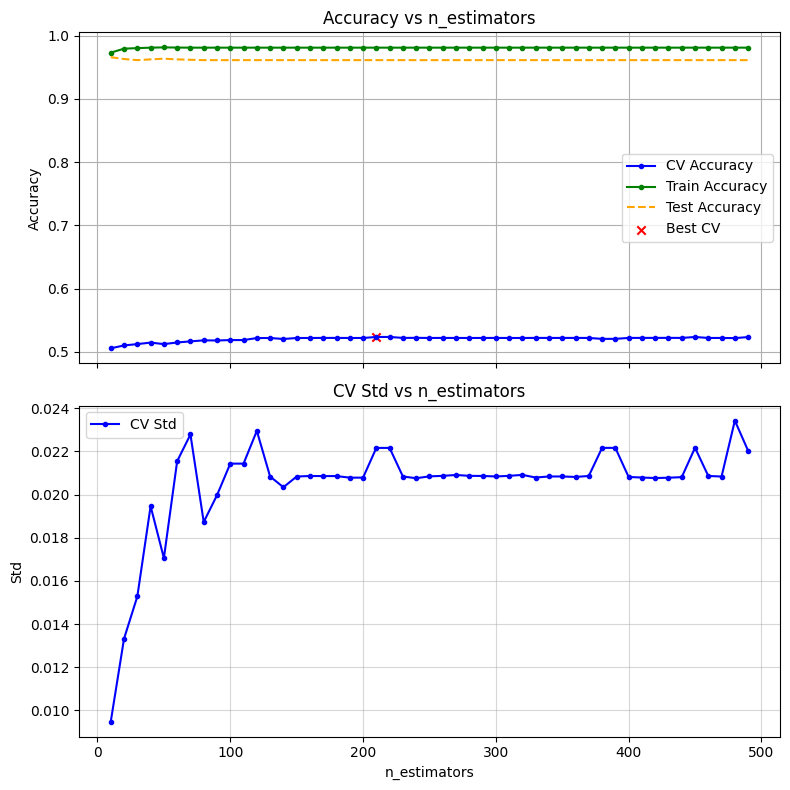

Execution Time: 00:03:31


Sweeping max_depth: 100%|██████████| 2/2 [00:06<00:00,  3.43s/it]


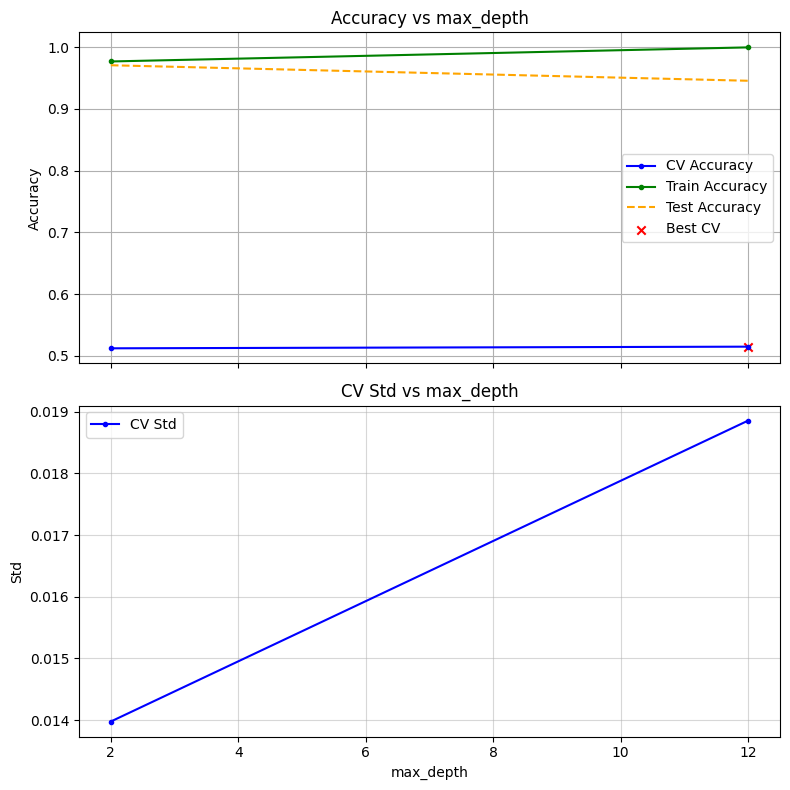

Execution Time: 00:00:06


Sweeping max_features: 100%|██████████| 10/10 [00:38<00:00,  3.80s/it]


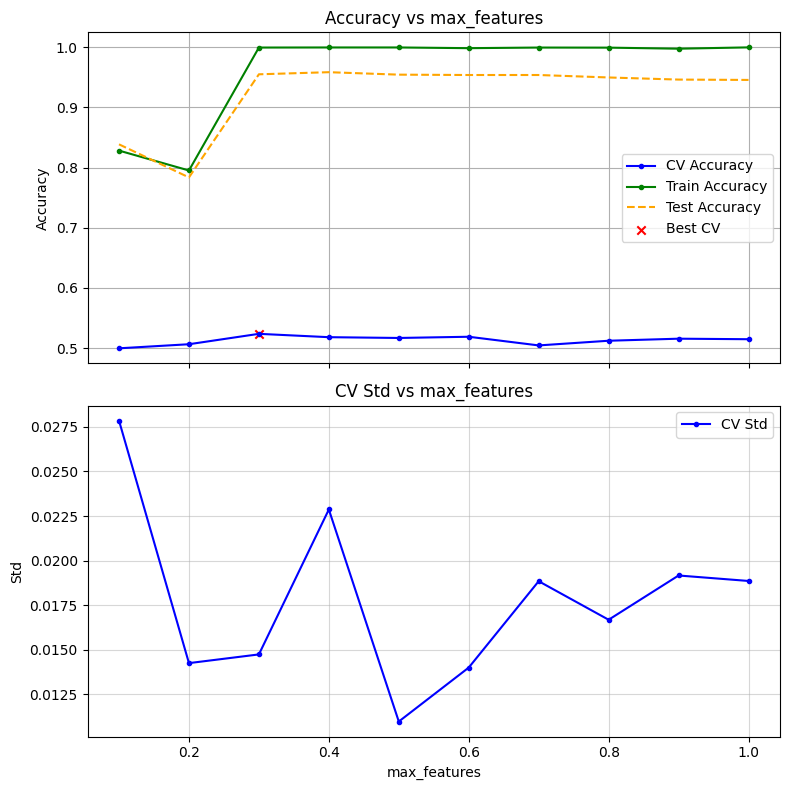

Execution Time: 00:00:38


,learning_rate,n_estimators,max_depth,max_features,min_samples_split,min_samples_leaf,max_leaf_nodes,subsample,random_state,accuracy_found
0,1.0,210,12,0.3,2,1,None,1.0,42,0.523716


In [195]:
start = time.time()

parameters_and_ranges = [
    ('learning_rate', np.logspace(-3, 0, 10)),
    ('n_estimators', range(10, 500, 10)),
    ('max_depth', list(range(2, 20, 10))),
    ('max_features', np.linspace(0.1,1,10)),

]

for param, parameter_list in parameters_and_ranges:
    Parameters_GradBoost = sweep_parameter(
        GradientBoostingClassifier,      # or your model class
        Parameters_GradBoost,          # renamed variable here
        param,
        parameter_list,
        X_train=bdb_X_train_scaled,
        y_train=bdb_y_train,
        X_test=bdb_X_test_scaled,
        y_test=bdb_y_test,
        n_jobs=-1,
        n_repeats=2
    )

Params_GradBoost_List.append(Parameters_GradBoost)
pd.DataFrame(Params_GradBoost_List)

And then model runs: 

In [199]:
params_ = {
    'learning_rate': 0.1,
    'n_estimators' : 20, 
    'max_depth' : 12, 
    'max_features' : 0.1,
    'random_state' : 42,
}

BDB_Grad_Boost_Tuned = run_model_classifier(
    GradientBoostingClassifier,
    bdb_X_train_scaled, 
    bdb_y_train, 
    bdb_X_test_scaled,
    bdb_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='BDB - Grad Boost - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

BDB_Grad_Boost_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.971516,0.00182,0.997514,0.973099,0.949704,0.510404,BDB - Grad Boost - Tuned


First and Future Set

In [200]:
params_ = {
    'learning_rate': 0.1,
    'n_estimators' : 20, 
    'max_depth' : 12, 
    'max_features' : 0.1,
    'random_state' : 42,
}

FNF_Grad_Boost_Tuned = run_model_classifier(
    GradientBoostingClassifier,
    fnf_X_train_scaled, 
    fnf_y_train, 
    fnf_X_test_scaled,
    fnf_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='FNF - Grad Boost - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

FNF_Grad_Boost_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.998898,0.000212,0.999995,0.998652,0.992537,0.499419,FNF - Grad Boost - Tuned


Punt Data Analytics Set

In [202]:
params_ = {
    'learning_rate': 0.1,
    'n_estimators' : 20, 
    'max_depth' : 12, 
    'max_features' : 0.1,
    'random_state' : 42,
}

PDA_Grad_Boost_Tuned = run_model_classifier(
    GradientBoostingClassifier,
    pda_X_train_scaled, 
    pda_y_train, 
    pda_X_test_scaled,
    pda_y_test,
    n_repeats=5, 
    n_jobs=-1, 
    run_comment='PDA - Grad Boost - Tuned', 
    return_model=False,
    concat_results=True,
    **params_
    )

PDA_Grad_Boost_Tuned

,model,model_params,mean_cv_accuracy,std_cv_accuracy,train_accuracy,test_accuracy,balanced_train_accuracy,balanced_test_accuracy,run_comment
0,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.977433,0.004111,0.999813,0.979806,0.993333,0.496212,PDA - Grad Boost - Tuned


#### **Gradient Boosting Trees Result**

In [208]:
combined_results[combined_results['run_comment'].str.contains('Grad Boost')].sort_values(by='balanced_test_accuracy', ascending=False)[['model', 'mean_cv_accuracy', 'test_accuracy', 'balanced_test_accuracy', 'run_comment']]

,model,mean_cv_accuracy,test_accuracy,balanced_test_accuracy,run_comment
14,GradientBoostingClassifier,0.971516,0.973099,0.510404,BDB - Grad Boost - Tuned
15,GradientBoostingClassifier,0.998898,0.998652,0.499419,FNF - Grad Boost - Tuned
16,GradientBoostingClassifier,0.977433,0.979806,0.496212,PDA - Grad Boost - Tuned


___

## **Results Thus Far (Weeks 2 - 6)**

In [217]:
all_results = pd.read_csv('../../Feature_Subsets/all_results.csv')

In [223]:
print(all_results.columns.tolist())

['model', 'mean_cv_accuracy', 'std_cv_accuracy', 'train_accuracy', 'test_accuracy', 'balanced_train_accuracy', 'balanced_test_accuracy', 'run_comment', 'week ']


In [232]:
milestone_1_performance = all_results.sort_values(by='balanced_test_accuracy', ascending=False)[['model', 'mean_cv_accuracy', 'test_accuracy', 'balanced_test_accuracy', 'run_comment', 'week ']].reset_index(drop=True)
milestone_1_performance.loc[0:9]

,model,mean_cv_accuracy,test_accuracy,balanced_test_accuracy,run_comment,week
0,LogisticRegression,0.610246,0.576664,0.738302,FNF PCA Features - Logistic_Regression,4.0
1,LogisticRegression,0.562554,0.570728,0.635352,FNF Backward Features - Logistic_Regression,4.0
2,LogisticRegression,0.620609,0.658938,0.624042,PDA Backward Features - Logistic_Regression,4.0
3,LogisticRegression,0.600339,0.706058,0.618873,PDA Forward Features - Logistic_Regression,4.0
4,LogisticRegression,0.553176,0.504925,0.602444,FNF Forward Features - Logistic_Regression,4.0
5,LogisticRegression,0.666675,0.704678,0.592590,BDB Forward Features - Logistic_Regression,4.0
6,LogisticRegression,0.570578,0.581420,0.590708,FNF_Logistic_Regression_Baseline,2.0
7,LogisticRegression,0.644541,0.641735,0.586297,PDA Logistic_Regression_Baseline,2.0
8,LogisticRegression,0.613019,0.454001,0.578320,PDA - Baseline Logistic Regression - Scaled Data,2.0
9,SVC,0.960104,0.959611,0.573084,PDA - Baseline SVC - rbf kernel,5.0
